## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Lets create synthetic data points
from sklearn.datasets import make_regression # Used to generates a random regression dataset

In [5]:
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)
# Noise = 3 means more the noise value more scatter the datapoints will be

In [6]:
X

array([[ 0.75344181,  2.09557824],
       [ 1.33863925,  0.10555152],
       [-0.46243292,  0.40553472],
       ...,
       [ 0.34947993, -0.19037633],
       [ 0.12535378, -0.42464729],
       [-0.69909634, -1.10716635]])

In [7]:
y

array([ 1.12780874e+02,  1.29932839e+02, -3.23711282e+01,  2.26982740e+01,
       -2.11689281e+02,  1.00586169e+02,  9.80516735e+01,  2.46001802e+02,
        1.09285626e+01, -1.15478870e+02, -2.83878675e+01,  1.79647114e+01,
        1.68831353e+02,  2.40553153e+01, -6.91490896e+00, -5.87332862e+01,
       -1.32465144e+02,  1.87534203e+02, -1.71095211e+02, -1.17170641e+02,
       -4.52091243e+01,  9.61821755e+01, -1.17847074e+02,  4.94738637e+00,
       -7.09145822e+01, -7.94476118e+00,  1.55369775e+02, -2.88778109e+01,
       -1.82730850e+02,  1.38234442e+01,  7.70690129e+01, -6.31524437e+01,
       -4.35169620e+01,  1.97572760e+02, -1.83420470e+02,  2.22165202e+02,
       -5.45368304e+01, -3.52337121e+01, -2.29199925e+02,  1.39525028e+01,
       -2.26060819e+01,  1.69827055e+02, -9.16842783e+01, -2.41072240e+01,
       -9.05096284e+01, -1.65920491e+02,  4.85869328e+01, -2.82765621e+02,
        3.43081686e+01, -1.30376778e+02,  1.73520438e+02,  2.54839627e+01,
       -1.45178772e+02, -

In [8]:
pd.DataFrame(X)[0]

0      0.753442
1      1.338639
2     -0.462433
3      0.418475
4     -2.413156
         ...   
995   -0.232884
996   -0.021969
997    0.349480
998    0.125354
999   -0.699096
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

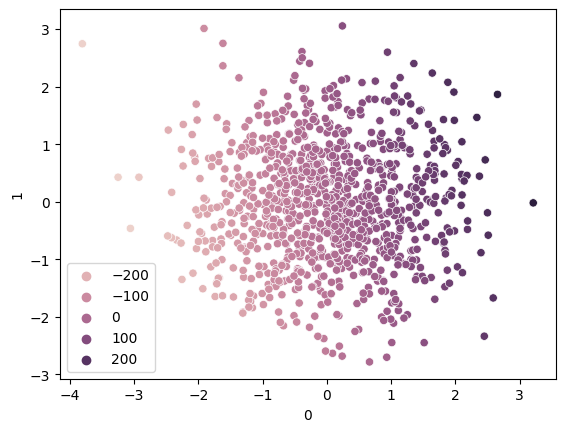

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=10)

In [11]:
from sklearn.svm import SVR

In [12]:
svr = SVR(kernel='linear')

In [13]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[89.7987392, 21.908817 ]])

In [15]:
## Prediction
y_pred = svr.predict(X_test)

In [16]:
y_pred

array([ 1.60061849e+02, -4.29927117e+01,  5.35488429e+01,  1.00019238e+02,
        4.30338118e+01, -3.75655247e+01, -9.74569959e+01, -5.32028183e+01,
        1.91271983e+01,  1.06341344e+02,  1.24091580e+02, -6.18539113e+01,
        4.85612846e+01, -1.66171067e+01,  1.20594632e+02,  1.44040625e+01,
       -4.02154971e+01,  8.31099165e-01, -6.72376861e+01,  4.81038076e+01,
        5.92094296e+01,  3.98578317e+01,  5.58373051e+01,  6.06848338e+01,
        1.13332828e+02, -1.34005888e+02, -1.11513554e+01, -4.38558305e+01,
       -6.03237698e+01,  3.84467912e+01,  1.05691119e+02, -9.65080937e+01,
        8.90725803e+01,  1.59256482e+02,  2.33436344e+01, -5.22074560e+00,
       -3.87123237e+01, -2.40471125e+01, -3.80345940e+01,  1.47591099e+02,
       -9.75968877e+00,  5.76328851e+01,  7.66824986e+01, -3.40000305e+01,
        1.69737411e+01,  8.14909840e+01,  4.14240012e+01,  3.89663719e+01,
        4.19923092e+01,  5.41073249e+00, -2.78932121e+01, -5.03936267e+00,
        6.91442882e+01, -

In [17]:
from sklearn.metrics import r2_score

In [18]:
print(r2_score(y_test, y_pred))

0.9989577336789334


99.89% accuracy because all my values are in between -3 to +3. Although it's almost feature scaled, but it's a small range btw.

## Hyperparameter Tuning With SVR

In [19]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [20]:
grid=GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [21]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.779 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.784 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.779 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.784 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.762 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [23]:
## Prediction
y_pred4 = grid.predict(X_test)
print(r2_score(y_test, y_pred4))

0.9989593611866646


99.89% accuracy